
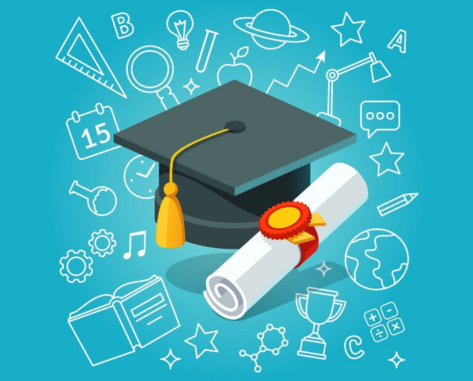
 </center>

# Giriş

<font color = 'green'>
İçerik: 
    
1. [Kütüphaneler ve veri yükleme](#1)
1. [Ön işleme](#2)
     * [Degree](#3)
     * [School name](#4)
     * [Fields of study](#5)
1. [Feature engineering](#6)
    * [Lisans](#7)
    * [Yüksek lisans](#8)
    * [Doktora](#9)
    * [Sertifika](#10)
    * [Toplam bölüm sayısı](#11)
    * [Değişken birleştirme](#12)
1. [Keşifçi veri analizi (EDA)](#13)
    * [Değişken sınırlandırma ve eksik veriler](#14)
    * [Kategorik değişken analizi](#15)
    * [Sayısal değişken analizi](#16)
    * [Toplam bölüm sayısı](#17)
    * [Okul ve derece birleştirme](#18)
1. [df_education veri seti oluşturma](#19)


<a id = "1"></a><br>
# 1. Kütüphaneler ve veri yükleme

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import matplotlib.pyplot as plt

%matplotlib inline
color = '#2ca25f'
cmap1 = 'Greens'
cmap2 =  'Set3'
palette1 = 'Greens'
palette2 = 'Set3'

root = '/kaggle/input/garanti-bbva-data-camp/'
target = 'moved_after_2019'
idx = 'user_id'

In [2]:
import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df_edu   = pd.read_csv(os.path.join(root, 'education.csv'))
df_train = pd.read_csv(os.path.join(root, 'train_users.csv'))
df_test  = pd.read_csv(os.path.join(root, 'test_users.csv'))

df = pd.concat([df_train, df_test], axis=0)

<a id = "2"></a><br>
# 2. Ön işleme

In [4]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142575 entries, 0 to 142574
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           142575 non-null  int64  
 1   school_name       142575 non-null  object 
 2   degree            106733 non-null  object 
 3   fields_of_study   122737 non-null  object 
 4   start_year_month  8202 non-null    float64
 5   end_year_month    7590 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 6.5+ MB


In [5]:
df_edu.head()

,user_id,school_name,degree,fields_of_study,start_year_month,end_year_month
0,0,Anadolu Üniversitesi,NaN,NaN,NaN,NaN
1,0,Adıyaman Üniversitesi,NaN,NaN,NaN,NaN
2,0,Fırat Üniversitesi,NaN,NaN,NaN,NaN
3,1,Fırat Üniversitesi,Yüksek Lisans,Yazılım Mühendisliği,NaN,NaN
4,1,Fırat Üniversitesi,Lisans,Yazılım Mühendisliği,NaN,NaN


In [6]:
df_edu["user_id"].nunique()

66271

In [7]:
df_edu.drop(columns=["start_year_month","end_year_month"], inplace = True)
df_edu = df_edu[df_edu['school_name'].notnull() & df_edu['degree'].notnull() & df_edu['fields_of_study'].notnull()]
df_edu.head()

,user_id,school_name,degree,fields_of_study
3,1,Fırat Üniversitesi,Yüksek Lisans,Yazılım Mühendisliği
4,1,Fırat Üniversitesi,Lisans,Yazılım Mühendisliği
5,2,Fırat Üniversitesi,4.sinif,Bilgisayar Mühendisliği
6,2,Hafsa Sultan Mesleki ve Teknik Anadolu Lisesi,lise,Çocuk Gelişimi ve Eğitimi Alanı
7,3,Fırat Üniversitesi,Lisans Derecesi,Bilgisayar Yazılımı Mühendisliği


* start_year_mont ve end_yead_month değişkenleri çok fazla eksik veri içerdiğinden çıkarılmıştır.
* degree değişkeni boş olan kayıtlar bozuk kayıtlardır. Bu nedenle çıkarılmıştır.

<a id = "3"></a><br>
## 2.1 Degree

In [8]:
df_edu['degree'] = df_edu.degree.apply(lambda x: " ".join(x.upper() for x in x.split())) # Büyük harf dönüşümü.
df_edu['degree'] = df_edu.degree.str.replace('[^\w\s]', '',regex = True) # noktalama işaretlerinin ortadan kaldırılması.
df_edu['degree'] = df_edu.degree.str.replace('\d', '',regex = True) # sayıların ortadan kaldırılması.

# Türkçe karakter düzeltme işlemi.
duzeltilecek_harfler = "çÇğĞıİöÖşŞüÜ"
duzeltilmis_harfler = "cCgGiIoOsSuU"
alfabe_duzeltme = str.maketrans(duzeltilecek_harfler, duzeltilmis_harfler)
df_edu['degree'] = df_edu.degree.str.translate(alfabe_duzeltme) 

df_edu['degree'] = df_edu.degree.str.strip() # Boşluk silme.

df_edu = df_edu[df_edu['degree'] != "" ] # Boş değerleri silme işlemi.

df_edu.degree.value_counts().head(20)

LISANS DERECESI                18988
BACHELORS DEGREE               16231
MASTERS DEGREE                  5834
YUKSEK LISANS MASTER            5188
LISANS                          3356
MASTER OF SCIENCE  MS           2338
BACHELOR OF SCIENCE  BS         2040
ONLISANS                        1666
BACHELOR OF SCIENCE BS          1595
ASSOCIATES DEGREE               1579
BACHELOR OF ENGINEERING  BE     1461
BACHELOR OF SCIENCE BSC         1431
ON LISANS                       1392
MASTER OF SCIENCE MSC           1240
LISE                            1061
BS                              1034
HIGH SCHOOL                     1025
DOCTOR OF PHILOSOPHY  PHD        855
HIGH SCHOOL DIPLOMA              750
BACHELOR OF ENGINEERING BE       748
Name: degree, dtype: int64

In [9]:
df_edu.loc[df_edu['degree'].str.contains("ASSOCIATE|ON|ON LISANS|ONLISANS|BILGISAYAR PROGRAMCILIGI", na=False), 'degree'] = "ÖNLİSANS"
df_edu.loc[df_edu['degree'].str.contains("DOCTOR|PHD|DOKTOR|DR", na=False), 'degree'] = "DOKTORA"
df_edu.loc[df_edu['degree'].str.contains("YUKSEK|MASTER|YUKSEK LISANS|MS|MBA|MA", na=False), 'degree'] = "YÜKSEK_LİSANS"
df_edu.loc[df_edu['degree'].str.contains("LISANS|BS|BACHELOR|MEZUN|GRADUATE|LICENTIATE|LICENCE|LICENSE|BA|FAKULTE|FACULTY|MUHENDIS|ENGINEER|ISLETME", na=False), 'degree'] = "LİSANS"
df_edu.loc[df_edu['degree'].str.contains("OGRENCI|STUDENT|SINIF", na=False), 'degree'] = "ÖĞRENCİ"
df_edu.loc[df_edu['degree'].str.contains("HIGH SCHOOL|LISE|HIGHSCHOOL|FEN BILIMLERI|ORTAOGRETIM|BILISIM TEKNOLOJILERI", na=False), 'degree'] = "LİSE"
df_edu.loc[df_edu['degree'].str.contains("ERASMUS", na=False), 'degree'] = "ERASMUS"
df_edu.loc[df_edu['degree'].str.contains("MINOR", na=False), 'degree'] = "ÇİFTANADAL"
df_edu.loc[df_edu['degree'].str.contains("CERTIFICATE|NANODEGREE|WINTER SCHOOL|COURSE", na=False), 'degree'] = "SERTİFİKA"
#df_edu.loc[df_edu['degree'].str.contains("SUMMER SCHOOL", na=False), 'degree'] = "ETKINLIK"

df_edu.loc[~df_edu["degree"].isin(["ÖNLİSANS","DOKTORA","YÜKSEK_LİSANS","LİSANS","ÖĞRENCİ","LİSE","ERASMUS","ÇİFTANADAL","SERTİFİKA"]), "degree"] = "DİĞER"
df_edu['degree'] = df_edu.degree.str.translate(alfabe_duzeltme) 

df_edu["degree"].value_counts().head(20)

LISANS           56715
YUKSEK_LISANS    20888
ONLISANS          8621
DIGER             2868
DOKTORA           2520
LISE              2438
OGRENCI            566
SERTIFIKA          363
ERASMUS            221
CIFTANADAL         192
Name: degree, dtype: int64

In [10]:
df_edu = df_edu[df_edu["degree"] != "LISE"]
df_edu = df_edu[df_edu["degree"] != "DIGER"]
df_edu = df_edu[df_edu["degree"] != "OGRENCI"]
df_edu["degree"].value_counts().head(10)

LISANS           56715
YUKSEK_LISANS    20888
ONLISANS          8621
DOKTORA           2520
SERTIFIKA          363
ERASMUS            221
CIFTANADAL         192
Name: degree, dtype: int64

* https://www.kaggle.com/code/zeynepozisil/eda-for-garanti-bbva-data-camp paylaşımı örnek alınmıştır.
* Ek olarak analiz edilip Sertifika, Erasmus ve Çift Anadal gibi farklı yorumlamalar gerçekleştirilmiştir.

<a id = "4"></a><br>
## 2.2 School name

In [11]:
df_edu.loc[df_edu['school_name'].str.contains("Oxford|Kaliforniya|Harvard|Stanford|Cambridge|Massachusetts|Princeton|Kaliforniya| Berkeley|Yale|Chicago|Kolombiya|Imperial|Johns Hopkins|Pensilvanya|ETH Zürih|Pekin|Tsinghua|Toronto|Londra", na=False), 'school_name'] = "TheFirstLevel(World)"
df_edu.loc[df_edu['school_name'].str.contains("Çankaya|Koç|Sabancı|ODTÜ|Bahçeşehir|Hacettepe|İstanbul Teknik|Istanbul Technical University|Bilkent|Boğaziçi|Düzce|Fırat|İstanbul Medeniyet|Özyeğin|Cankaya|Koc|Sabanci|Odtu|Bahcesehir|Istanbul Teknik|Bogazici|Düzce|Firat|Istanbul Medeniyet|Ozyegin", na=False), 'school_name'] = "TheFirstLevel(TR)"
df_edu.loc[df_edu['school_name'].str.contains("İstanbul Üniversitesi|Istanbul University|Ankara|Ege|İhsan Doğramacı|Bilkent|Gebze|Gazi|Yıldız|Yildiz Technical University|Sabancı|İzmir Yüksek Teknoloji|Atatürk|Bezm-i Alem|Erciyes|Marmara|Dokuz Eylül|Selçuk|Çukurova|Karadeniz Teknik|Eskişehir Osmangazi|Akdeniz|Abdullah Gül|Bursa Uludağ|Ondokuz Mayıs|İnönü|Anadolu", na=False), 'school_name'] = "TheSecondLevel(TR)"
df_edu.loc[df_edu['school_name'].str.contains("Süleyman Demirel|Gaziantep|Sakarya|Çankaya|Kocaeli|Van Yüzüncü|İzmir Katip Çelebi|Yıldırım Beyazıt|Başkent|Atılım|Dicle|Manisa Celâl Bayar|Pamukkale|Tobb Ekonomi Ve Teknoloji|Acıbadem Mehmet Ali Aydınlar|Mersin|Yeditepe", na=False), 'school_name'] = "TheLowLevel(TR)"

* https://www.kaggle.com/code/zeynepozisil/eda-for-garanti-bbva-data-camp paylaşımı örnek alınmıştır.

1) Dünya sıralamasında ilk 20 de yer alan üniversiteler : TheFirstLevel(World) // https://www.timeshighereducation.com/world-university-rankings/2022/world-ranking#!/page/0/length/25/sort_by/rank/sort_order/asc/cols/stats

2) Dünya sıralamasında ilk 1000 de yer alan TÜRK üniversiteler : TheFirstLevel(TR) // https://tr.euronews.com/2022/10/12/dunyanin-en-iyi-universiteleri-aciklandi-ilk-500de-turkiyeden-sadece-1-universite-var

3) TR sıralamasında ilk 30 da yer alan üniversiteler : TheSecondLevel(TR) // https://egezegen.com/egitim/turkiyenin-en-iyi-universiteleri-siralamasi/

4) TR sıralamasında ilk 50 de yer alan üniversiteler : TheLowLevel(TR) // https://egezegen.com/egitim/turkiyenin-en-iyi-universiteleri-siralamasi/

In [12]:
df_edu.loc[df_edu['school_name'].str.contains("Orta Doğu Teknik Üniversitesi|Middle East Technical University", na=False), 'school_name'] = "TheFirstLevel(TR)"
df_edu.loc[df_edu['school_name'].str.contains("Karadeniz Technical University|Dokuz Eylul University|Uludağ Üniversitesi|Uludag University|Ataturk|Istanbul Üniversitesi|İstanbul University|Eskisehir Osmangazi University", na=False), 'school_name'] = "TheSecondLevel(TR)"
df_edu.loc[~df_edu["school_name"].isin(["TheFirstLevel(World)","TheFirstLevel(TR)","TheSecondLevel(TR)","TheLowLevel(TR)"]), "school_name"] = "Diğer"

df_edu['school_name'].value_counts().head(10)

TheSecondLevel(TR)      38904
TheFirstLevel(TR)       25818
Diğer                   17688
TheLowLevel(TR)          6973
TheFirstLevel(World)      137
Name: school_name, dtype: int64

* Yukardaki listede eksik kalan alanlar eklenmiştir.

<a id = "5"></a><br>
## 2.3 Fields of study

In [13]:
df_edu.loc[df_edu['fields_of_study'].str.contains("Computer Engineer", na=False), 'fields_of_study'] = "Bilgisayar Mühendisliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("Electronic Engineering|Electrical and Electronic Engineering|Electrical and Electronic Engineering|Electronics Engineering|Communication Engineering|Elektrik Mühendisliği|Telecommunications Engineering|Telekomünikasyon Mühendisliği|Elektrik, Elektronik ve İletişim Mühendisliği|Elektronik Mühendisliği|Electrical Engineering|Electrical, Electronics and Communications Engineering|Elektronik ve Haberleşme Mühendisliği|Electronics and Communication Engineering|Electronics and Communications Engineering", na=False), 'fields_of_study'] = "Elektrik ve Elektronik Mühendisliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("Mechanical Engineering", na=False), 'fields_of_study'] = "Makine Mühendisliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("İşletme ve Yönetim, Genel|Business Administration|Business Administration|Business|MBA", na=False), 'fields_of_study'] = "İşletme"
df_edu.loc[df_edu['fields_of_study'].str.contains("Industrial Engineering", na=False), 'fields_of_study'] = "Endüstri Mühendisliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("Mathematics", na=False), 'fields_of_study'] = "Matematik"
df_edu.loc[df_edu['fields_of_study'].str.contains("Bilgisayar Teknolojileri ve Programlama|Management Information Systems|Information Technolog|Yönetim Bilgi Sistemleri|Information Systems|Bilişim Teknolojileri|Bilişim Sistemleri|Informatics|Bilgi Teknolojisi|Management Information System|Computer Science|Computer Programming|Bilgisayar Program|Bilgisayar Teknolojisi|Matematik ve Bilgisayar Bilimleri|Computer Technology and Programming", na=False), 'fields_of_study'] = "Yönetim Bilişim Sistemleri"
df_edu.loc[df_edu['fields_of_study'].str.contains("Software Engineer|Bilgisayar Yazılımı Mühendisliği", na=False), 'fields_of_study'] = "Yazılım Mühendisliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("Economics|Ekonomi", na=False), 'fields_of_study'] = "İktisat"
df_edu.loc[df_edu['fields_of_study'].str.contains("Chemical Engineering", na=False), 'fields_of_study'] = "Kimya Mühendisliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("Mekatronik, Robotik ve Otomasyon Mühendisliği|Mechatronics Engineering|Control and Automation Engineering|Automation Engineering|Otomasyon Mühendisliği", na=False), 'fields_of_study'] = "Mekatronik Mühendisliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("Civil Engineering", na=False), 'fields_of_study'] = "İnşaat Mühendisliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("Physics|Physical Sciences", na=False), 'fields_of_study'] = "Fizik"
df_edu.loc[df_edu['fields_of_study'].str.contains("Chemistry|Kimya", na=False), 'fields_of_study'] = "Kimya"
df_edu.loc[df_edu['fields_of_study'].str.contains("Mathematical Engineering", na=False), 'fields_of_study'] = "Matematik Mühendisliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("Statistics", na=False), 'fields_of_study'] = "İstatistik"
df_edu.loc[df_edu['fields_of_study'].str.contains("Food Engineering", na=False), 'fields_of_study'] = "Gıda Mühendisliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("Engineering Management|Engineering/Industrial Management|Management", na=False), 'fields_of_study'] = "Mühendislik Yönetimi"
df_edu.loc[df_edu['fields_of_study'].str.contains("International Relations|International Relations and Affairs|Uluslararası İlişkiler", na=False), 'fields_of_study'] = "Uluslararası İlişkiler"
df_edu.loc[df_edu['fields_of_study'].str.contains("Law", na=False), 'fields_of_study'] = "Avukat"
df_edu.loc[df_edu['fields_of_study'].str.contains("Bilgisayar ve Öğretim Teknolojileri Öğretmenliği", na=False), 'fields_of_study'] = "Bilgisayar Öğretmenliği"
df_edu.loc[df_edu['fields_of_study'].str.contains("Artificial Intelligence", na=False), 'fields_of_study'] = "Yapay Zeka"
df_edu.loc[df_edu['fields_of_study'].str.contains("Metallurgical and Materials Engineering", na=False), 'fields_of_study'] = "Metalurji ve Malzeme Mühendisliği"

df_edu.loc[~df_edu["fields_of_study"].isin(["Bilgisayar Mühendisliği","Elektrik ve Elektronik Mühendisliği","Makine Mühendisliği","İşletme","Endüstri Mühendisliği","Yönetim Bilişim Sistemleri","Yazılım Mühendisliği","İktisat","Kimya Mühendisliği","Mekatronik Mühendisliği","İnşaat Mühendisliği","Fizik","Kimya","Matematik Mühendisliği","İstatistik","Gıda Mühendisliği","Mühendislik Yönetimi","Uluslararası İlişkiler","Avukat","Bilgisayar Öğretmenliği","Yapay Zeka","Metalurji ve Malzeme Mühendisliği"]), "fields_of_study"] = "Diğer"

df_edu['fields_of_study'].value_counts().head(40)

Diğer                                  23502
Bilgisayar Mühendisliği                23450
Yönetim Bilişim Sistemleri             12835
Elektrik ve Elektronik Mühendisliği    10273
İşletme                                 4393
Yazılım Mühendisliği                    2554
Makine Mühendisliği                     1914
Endüstri Mühendisliği                   1813
Mühendislik Yönetimi                    1692
Mekatronik Mühendisliği                 1302
Kimya                                   1152
İktisat                                  897
Fizik                                    864
Matematik Mühendisliği                   605
İnşaat Mühendisliği                      465
Uluslararası İlişkiler                   455
İstatistik                               368
Bilgisayar Öğretmenliği                  279
Gıda Mühendisliği                        250
Metalurji ve Malzeme Mühendisliği        166
Yapay Zeka                               146
Avukat                                   145
Name: fiel

In [14]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89520 entries, 3 to 142573
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          89520 non-null  int64 
 1   school_name      89520 non-null  object
 2   degree           89520 non-null  object
 3   fields_of_study  89520 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.4+ MB


In [15]:
df_edu = df_edu.drop_duplicates(['user_id', 'degree','fields_of_study']) 
df_edu.info()

        # Çoklama kontrolü için uygulanabilir.
        # 4.218 çoklanan değer çıkarıldı.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85302 entries, 3 to 142573
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          85302 non-null  int64 
 1   school_name      85302 non-null  object
 2   degree           85302 non-null  object
 3   fields_of_study  85302 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


<a id = "6"></a><br>
# 3. Feature engineering

<a id = "7"></a><br>
## 3.1 Lisans

* Lisans mezuniyet sayıları hesaplanmak istenmektedir.
* İkinci üniversite gibi detaylar modelde etki yaratabilir düşüncesi ile eklenmiştir.

In [16]:
df_lisans = df_edu[df_edu['degree'] == "LISANS" ]
df_lisans = df_lisans.pivot_table(index='user_id',values='degree',aggfunc='nunique')
df_lisans.columns = ['lisanscount']
df_lisans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47728 entries, 1 to 66273
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   lisanscount  47728 non-null  int64
dtypes: int64(1)
memory usage: 745.8 KB


<a id = "8"></a><br>
## 3.2 Yüksek lisans

* Yüksek Lisans mezuniyet sayıları hesaplanmak istenmektedir.
* İkinci üniversite gibi detaylar modelde etki yaratabilir düşüncesi ile eklenmiştir.

In [17]:
df_yuksek = df_edu[df_edu['degree'] == "YUKSEK_LISANS" ]
df_yuksek = df_yuksek.pivot_table(index='user_id',values='degree',aggfunc='nunique')
df_yuksek.columns = ['yuksekcount']
df_yuksek.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18956 entries, 1 to 66273
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   yuksekcount  18956 non-null  int64
dtypes: int64(1)
memory usage: 296.2 KB


<a id = "9"></a><br>
## 3.3 Doktora

* Yüksek Lisans mezuniyet sayıları hesaplanmak istenmektedir.
* İkinci üniversite gibi detaylar modelde etki yaratabilir düşüncesi ile eklenmiştir.

In [18]:
df_doktora = df_edu[df_edu['degree'] == "DOKTORA" ]
df_doktora = df_doktora.pivot_table(index='user_id',values='degree',aggfunc='nunique')
df_doktora.columns = ['doktoracount']
df_doktora.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2419 entries, 34 to 66271
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   doktoracount  2419 non-null   int64
dtypes: int64(1)
memory usage: 37.8 KB


<a id = "10"></a><br>
## 3.4 Sertifika

In [19]:
df_sertifika = df_edu[df_edu['degree'] == "SERTIFIKA" ]
df_sertifika = df_sertifika.pivot_table(index='user_id',values='degree',aggfunc='nunique')
df_sertifika.columns = ['SERTIFIKAcount']
df_sertifika.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 2180 to 66239
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   SERTIFIKAcount  301 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


<a id = "11"></a><br>
## 3.5 Toplam bölüm sayısı

* Kaç farklı bölüm ile temas ettiği analiz edilmek istenmektedir.

In [20]:
df_study = df_edu[df_edu['fields_of_study'] != "Diğer" ]
df_study = df_study.pivot_table(index='user_id',values='fields_of_study',aggfunc='nunique')
df_study.columns = ['studycount']
df_study.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45382 entries, 1 to 66273
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   studycount  45382 non-null  int64
dtypes: int64(1)
memory usage: 709.1 KB


<a id = "12"></a><br>
## 3.6 Okul ve derece birleştirme

In [21]:
df_edu["Degree_School"] = df_edu['school_name'] + "_" + df_edu['degree']
df_edu.head()

,user_id,school_name,degree,fields_of_study,Degree_School
3,1,TheFirstLevel(TR),YUKSEK_LISANS,Yazılım Mühendisliği,TheFirstLevel(TR)_YUKSEK_LISANS
4,1,TheFirstLevel(TR),LISANS,Yazılım Mühendisliği,TheFirstLevel(TR)_LISANS
7,3,TheFirstLevel(TR),LISANS,Yazılım Mühendisliği,TheFirstLevel(TR)_LISANS
8,4,TheFirstLevel(TR),LISANS,Yazılım Mühendisliği,TheFirstLevel(TR)_LISANS
9,5,TheFirstLevel(TR),YUKSEK_LISANS,Yazılım Mühendisliği,TheFirstLevel(TR)_YUKSEK_LISANS


In [22]:
df_edu.drop(columns=["school_name","degree"], inplace = True)
df_edu.head()

,user_id,fields_of_study,Degree_School
3,1,Yazılım Mühendisliği,TheFirstLevel(TR)_YUKSEK_LISANS
4,1,Yazılım Mühendisliği,TheFirstLevel(TR)_LISANS
7,3,Yazılım Mühendisliği,TheFirstLevel(TR)_LISANS
8,4,Yazılım Mühendisliği,TheFirstLevel(TR)_LISANS
9,5,Yazılım Mühendisliği,TheFirstLevel(TR)_YUKSEK_LISANS


<a id = "13"></a><br>
# 4. Keşifçi veri analizi (EDA)

In [23]:
df_edu1 = df_edu.merge(df, on="user_id", how="left")
df_edu1 = df_edu1.merge(df_lisans, on="user_id", how="left")
df_edu1 = df_edu1.merge(df_doktora, on="user_id", how="left")
df_edu1 = df_edu1.merge(df_yuksek, on="user_id", how="left")
df_edu1 = df_edu1.merge(df_sertifika, on="user_id", how="left")

df_edu1.head()

,user_id,fields_of_study,Degree_School,industry,location,moved_after_2019,lisanscount,doktoracount,yuksekcount,SERTIFIKAcount
0,1,Yazılım Mühendisliği,TheFirstLevel(TR)_YUKSEK_LISANS,Computer Software,"Ankara, Turkey",NaN,1.000,NaN,1.000,NaN
1,1,Yazılım Mühendisliği,TheFirstLevel(TR)_LISANS,Computer Software,"Ankara, Turkey",NaN,1.000,NaN,1.000,NaN
2,3,Yazılım Mühendisliği,TheFirstLevel(TR)_LISANS,Computer Software,"Yesilyurt, Malatya, Turkey",0.000,1.000,NaN,NaN,NaN
3,4,Yazılım Mühendisliği,TheFirstLevel(TR)_LISANS,Computer Software,Turkey,NaN,1.000,NaN,NaN,NaN
4,5,Yazılım Mühendisliği,TheFirstLevel(TR)_YUKSEK_LISANS,Computer Software,"Kocaeli, Turkey",0.000,1.000,NaN,1.000,NaN


In [24]:
df_edu1.drop(columns=["industry","location"], inplace = True)
df_edu1.head()

,user_id,fields_of_study,Degree_School,moved_after_2019,lisanscount,doktoracount,yuksekcount,SERTIFIKAcount
0,1,Yazılım Mühendisliği,TheFirstLevel(TR)_YUKSEK_LISANS,NaN,1.000,NaN,1.000,NaN
1,1,Yazılım Mühendisliği,TheFirstLevel(TR)_LISANS,NaN,1.000,NaN,1.000,NaN
2,3,Yazılım Mühendisliği,TheFirstLevel(TR)_LISANS,0.000,1.000,NaN,NaN,NaN
3,4,Yazılım Mühendisliği,TheFirstLevel(TR)_LISANS,NaN,1.000,NaN,NaN,NaN
4,5,Yazılım Mühendisliği,TheFirstLevel(TR)_YUKSEK_LISANS,0.000,1.000,NaN,1.000,NaN


In [25]:
df_edu1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85302 entries, 0 to 85301
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           85302 non-null  int64  
 1   fields_of_study   85302 non-null  object 
 2   Degree_School     85302 non-null  object 
 3   moved_after_2019  68121 non-null  float64
 4   lisanscount       78608 non-null  float64
 5   doktoracount      7338 non-null   float64
 6   yuksekcount       42075 non-null  float64
 7   SERTIFIKAcount    841 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 5.9+ MB


<a id = "14"></a><br>
## 4.1 Değişken sınırlandırma ve eksik veriler

In [26]:
df_edu1['lisanscount'].fillna(0, inplace=True)
df_edu1['doktoracount'].fillna(0, inplace=True)
df_edu1['yuksekcount'].fillna(0, inplace=True)
df_edu1['SERTIFIKAcount'].fillna(0, inplace=True)

cat_cols = [col for col in df_edu1.columns if df_edu1[col].dtype == 'object']
num_cols = ['lisanscount', 'doktoracount', 'yuksekcount','SERTIFIKAcount']

df_edu1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85302 entries, 0 to 85301
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           85302 non-null  int64  
 1   fields_of_study   85302 non-null  object 
 2   Degree_School     85302 non-null  object 
 3   moved_after_2019  68121 non-null  float64
 4   lisanscount       85302 non-null  float64
 5   doktoracount      85302 non-null  float64
 6   yuksekcount       85302 non-null  float64
 7   SERTIFIKAcount    85302 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 5.9+ MB


<a id = "15"></a><br>
## 4.2 Kategorik değişken analizi

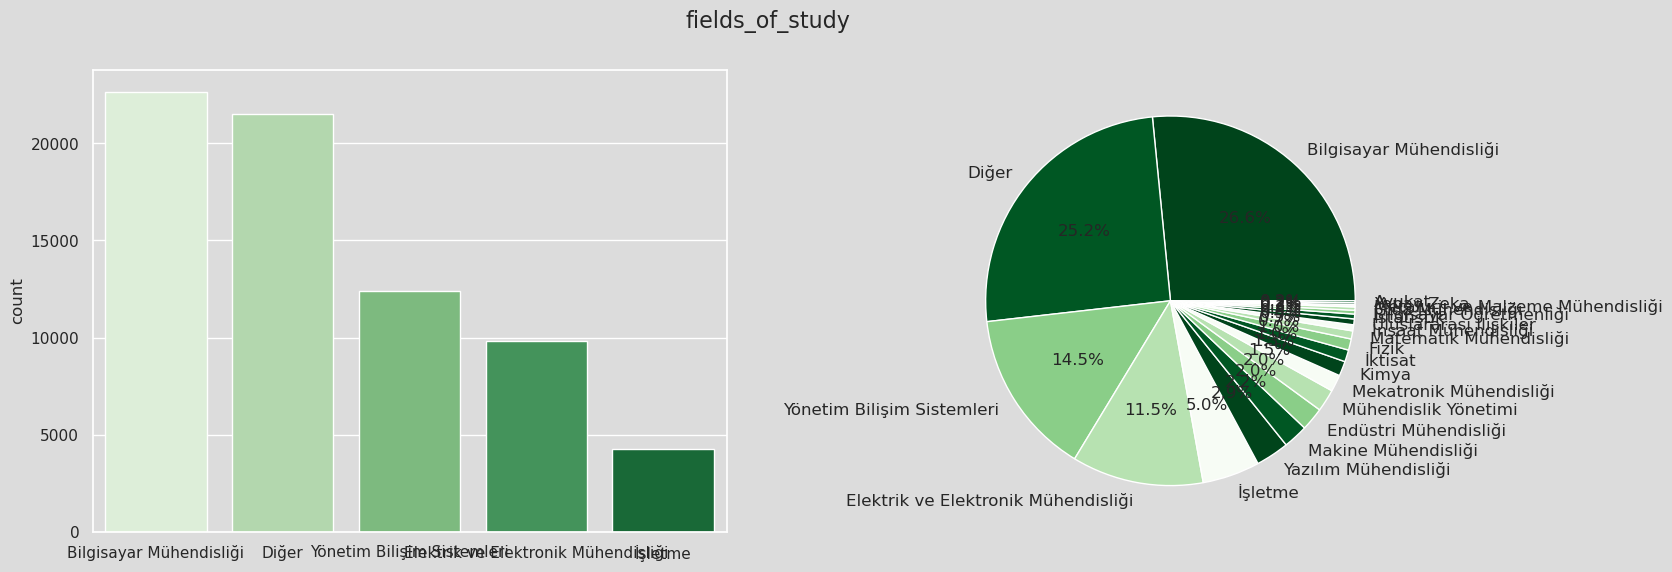

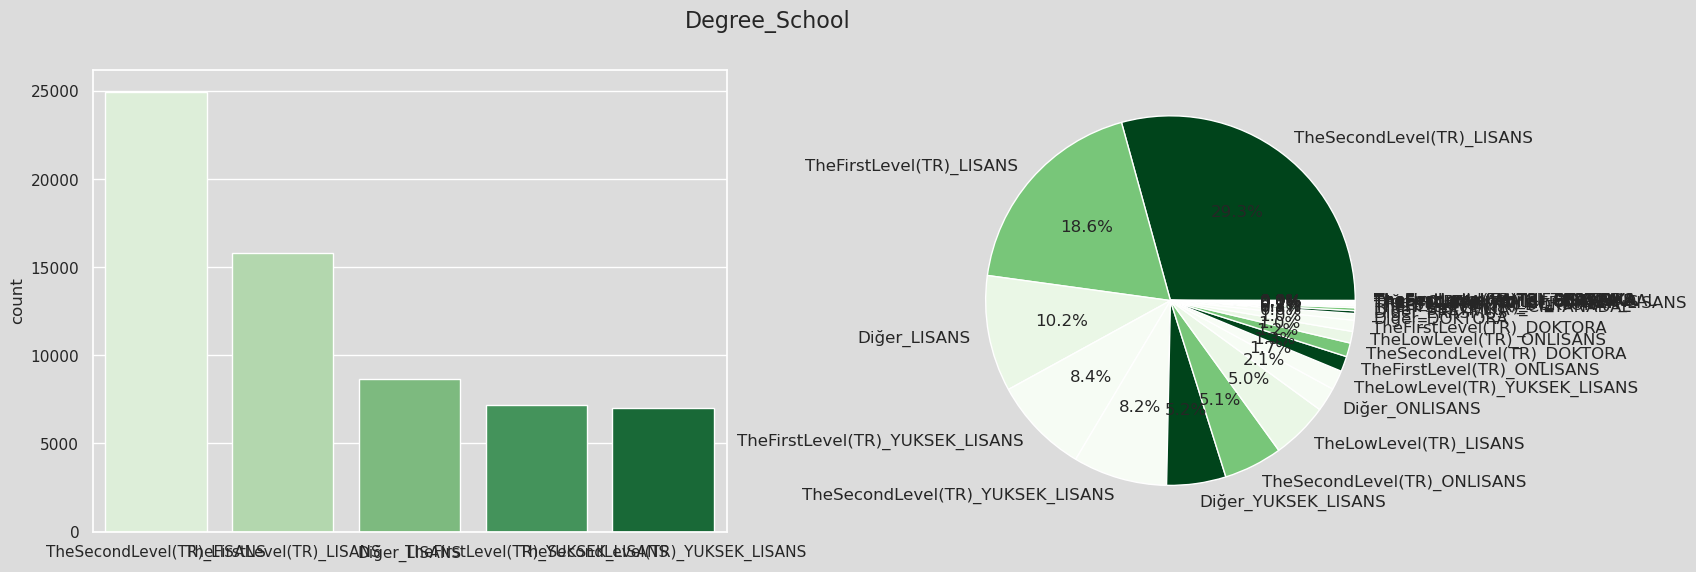

In [27]:
def cat_analyser(data, col, freq_limit = 5):
    df_ = data.copy()
    sns.set(rc = {'axes.facecolor': 'gainsboro',
                  'figure.facecolor': 'gainsboro'})
    if df_[col].nunique() > freq_limit:
        df_ = df_.loc[df_[col].isin(df_[col].value_counts(). \
                                    keys()[:freq_limit].tolist())]
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
    fig.suptitle(col, fontsize = 16)
    sns.countplot(data = df_,
                  x = col,
                  ax = ax[0],
                  palette= palette1,
                  order =  df_[col].value_counts().index)
    ax[0].set_xlabel('')
    pie_cmap = plt.get_cmap(cmap1)
    normalize = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)) 
    data[col].value_counts().plot.pie(autopct = '%1.1f%%',
                                      textprops = {'fontsize': 12},
                                      ax = ax[1],
                                      colors = pie_cmap(normalize(df_[col].value_counts())))
    ax[1].set_ylabel('')
    plt.show()
    matplotlib.rc_file_defaults()
    sns.reset_orig()


for col in cat_cols:
    cat_analyser(df_edu1, col)

In [28]:
# Kategorik değişkenlerin hedef değişken ile analizi;
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")
    
for col in cat_cols:
    target_summary_with_cat(df_edu1,"moved_after_2019",col)

                                     TARGET_MEAN
fields_of_study                                 
Avukat                                     0.322
Bilgisayar Mühendisliği                    0.432
Bilgisayar Öğretmenliği                    0.347
Diğer                                      0.392
Elektrik ve Elektronik Mühendisliği        0.420
Endüstri Mühendisliği                      0.460
Fizik                                      0.360
Gıda Mühendisliği                          0.371
Kimya                                      0.328
Makine Mühendisliği                        0.428
Matematik Mühendisliği                     0.422
Mekatronik Mühendisliği                    0.514
Metalurji ve Malzeme Mühendisliği          0.392
Mühendislik Yönetimi                       0.366
Uluslararası İlişkiler                     0.413
Yapay Zeka                                 0.393
Yazılım Mühendisliği                       0.459
Yönetim Bilişim Sistemleri                 0.413
İktisat             

<a id = "16"></a><br>
## 4.3 Sayısal değişken analizi

count   85302.000
mean        0.922
std         0.269
min         0.000
5%          0.000
10%         1.000
20%         1.000
30%         1.000
40%         1.000
50%         1.000
60%         1.000
70%         1.000
80%         1.000
90%         1.000
95%         1.000
99%         1.000
max         1.000
Name: lisanscount, dtype: float64


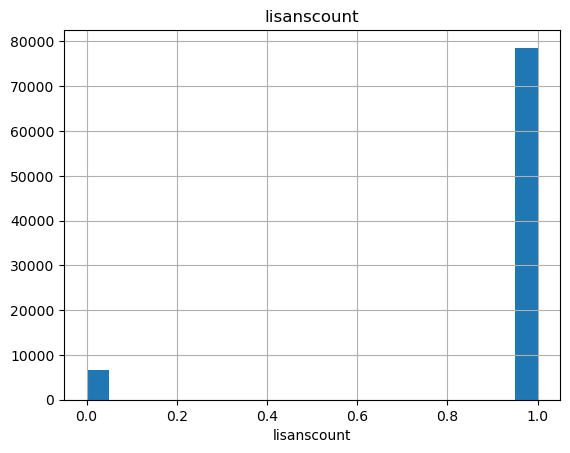

count   85302.000
mean        0.086
std         0.280
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.000
70%         0.000
80%         0.000
90%         0.000
95%         1.000
99%         1.000
max         1.000
Name: doktoracount, dtype: float64


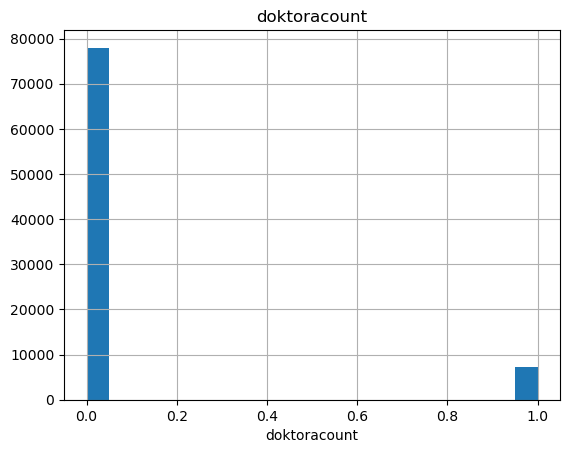

count   85302.000
mean        0.493
std         0.500
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         1.000
70%         1.000
80%         1.000
90%         1.000
95%         1.000
99%         1.000
max         1.000
Name: yuksekcount, dtype: float64


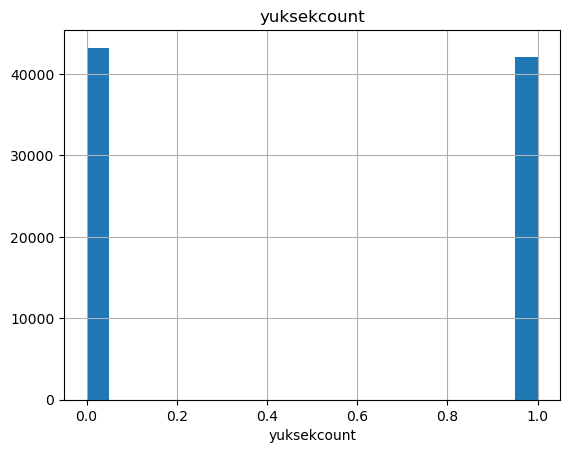

count   85302.000
mean        0.010
std         0.099
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.000
70%         0.000
80%         0.000
90%         0.000
95%         0.000
99%         0.000
max         1.000
Name: SERTIFIKAcount, dtype: float64


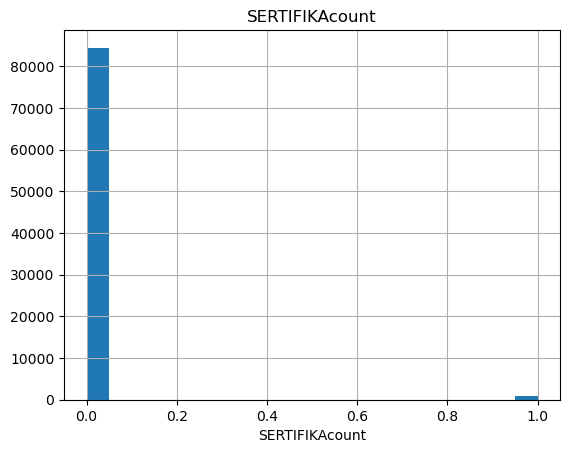

In [29]:
# Numerik değişken analizi
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()    

for col in num_cols:
    num_summary(df_edu1, col, True)

In [30]:
# Numerik değişkenlerin hedef değişken ile analizi;
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col:"mean"}), end="\n\n\n")
    
for col in num_cols:
    target_summary_with_num(df_edu1, "moved_after_2019", col)

                  lisanscount
moved_after_2019             
0.000                   0.912
1.000                   0.932


                  doktoracount
moved_after_2019              
0.000                    0.096
1.000                    0.073


                  yuksekcount
moved_after_2019             
0.000                   0.504
1.000                   0.479


                  SERTIFIKAcount
moved_after_2019                
0.000                      0.010
1.000                      0.009




In [31]:
df_edu1.drop(columns=["moved_after_2019","lisanscount","doktoracount","yuksekcount","SERTIFIKAcount"], inplace = True)
df_edu1.head()

,user_id,fields_of_study,Degree_School
0,1,Yazılım Mühendisliği,TheFirstLevel(TR)_YUKSEK_LISANS
1,1,Yazılım Mühendisliği,TheFirstLevel(TR)_LISANS
2,3,Yazılım Mühendisliği,TheFirstLevel(TR)_LISANS
3,4,Yazılım Mühendisliği,TheFirstLevel(TR)_LISANS
4,5,Yazılım Mühendisliği,TheFirstLevel(TR)_YUKSEK_LISANS


<a id = "17"></a><br>
## 4.4 Toplam bölüm sayısı

In [32]:
df_edu2 = df_edu1.drop_duplicates(['user_id','fields_of_study', 'Degree_School'])
df_edu2 = df_edu2.pivot_table(index='user_id', columns='Degree_School', values='Degree_School',aggfunc='count')
df_edu2.head()

Degree_School,Diğer_CIFTANADAL,Diğer_DOKTORA,Diğer_ERASMUS,Diğer_LISANS,Diğer_ONLISANS,Diğer_SERTIFIKA,Diğer_YUKSEK_LISANS,TheFirstLevel(TR)_CIFTANADAL,TheFirstLevel(TR)_DOKTORA,TheFirstLevel(TR)_LISANS,TheFirstLevel(TR)_ONLISANS,TheFirstLevel(TR)_SERTIFIKA,TheFirstLevel(TR)_YUKSEK_LISANS,TheFirstLevel(World)_DOKTORA,TheFirstLevel(World)_LISANS,TheFirstLevel(World)_ONLISANS,TheFirstLevel(World)_SERTIFIKA,TheFirstLevel(World)_YUKSEK_LISANS,TheLowLevel(TR)_CIFTANADAL,TheLowLevel(TR)_DOKTORA,TheLowLevel(TR)_LISANS,TheLowLevel(TR)_ONLISANS,TheLowLevel(TR)_YUKSEK_LISANS,TheSecondLevel(TR)_CIFTANADAL,TheSecondLevel(TR)_DOKTORA,TheSecondLevel(TR)_ERASMUS,TheSecondLevel(TR)_LISANS,TheSecondLevel(TR)_ONLISANS,TheSecondLevel(TR)_SERTIFIKA,TheSecondLevel(TR)_YUKSEK_LISANS
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_edu2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53330 entries, 1 to 66273
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Diğer_CIFTANADAL                    23 non-null     float64
 1   Diğer_DOKTORA                       493 non-null    float64
 2   Diğer_ERASMUS                       216 non-null    float64
 3   Diğer_LISANS                        8300 non-null   float64
 4   Diğer_ONLISANS                      1734 non-null   float64
 5   Diğer_SERTIFIKA                     206 non-null    float64
 6   Diğer_YUKSEK_LISANS                 4337 non-null   float64
 7   TheFirstLevel(TR)_CIFTANADAL        137 non-null    float64
 8   TheFirstLevel(TR)_DOKTORA           821 non-null    float64
 9   TheFirstLevel(TR)_LISANS            15266 non-null  float64
 10  TheFirstLevel(TR)_ONLISANS          1136 non-null   float64
 11  TheFirstLevel(TR)_SERTIFIKA         72 no

<a id = "18"></a><br>
## 4.5 Okul ve derece birleştirme

In [34]:
df_edu3 = df_edu1.drop_duplicates(['user_id', 'fields_of_study'])
df_edu3 = df_edu3.pivot_table(index='user_id', columns='fields_of_study', values='fields_of_study',aggfunc='count')
df_edu3.head()

fields_of_study,Avukat,Bilgisayar Mühendisliği,Bilgisayar Öğretmenliği,Diğer,Elektrik ve Elektronik Mühendisliği,Endüstri Mühendisliği,Fizik,Gıda Mühendisliği,Kimya,Makine Mühendisliği,Matematik Mühendisliği,Mekatronik Mühendisliği,Metalurji ve Malzeme Mühendisliği,Mühendislik Yönetimi,Uluslararası İlişkiler,Yapay Zeka,Yazılım Mühendisliği,Yönetim Bilişim Sistemleri,İktisat,İnşaat Mühendisliği,İstatistik,İşletme
user_id,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_edu3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53330 entries, 1 to 66273
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Avukat                               92 non-null     float64
 1   Bilgisayar Mühendisliği              20020 non-null  float64
 2   Bilgisayar Öğretmenliği              278 non-null    float64
 3   Diğer                                17821 non-null  float64
 4   Elektrik ve Elektronik Mühendisliği  7967 non-null   float64
 5   Endüstri Mühendisliği                1477 non-null   float64
 6   Fizik                                715 non-null    float64
 7   Gıda Mühendisliği                    217 non-null    float64
 8   Kimya                                917 non-null    float64
 9   Makine Mühendisliği                  1515 non-null   float64
 10  Matematik Mühendisliği               584 non-null    float64
 11  Mekatronik Mühendisliği     

<a id = "18"></a><br>
# 5. df_education veri seti oluşturma

In [36]:
df_education = df_edu.drop_duplicates(['user_id'])
df_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53330 entries, 3 to 142572
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          53330 non-null  int64 
 1   fields_of_study  53330 non-null  object
 2   Degree_School    53330 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [37]:
df_education.drop(columns=["fields_of_study","Degree_School"], inplace = True)
df_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53330 entries, 3 to 142572
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  53330 non-null  int64
dtypes: int64(1)
memory usage: 833.3 KB


In [38]:
df_education = df_education.merge(df_edu2, on="user_id", how="left")
df_education = df_education.merge(df_edu3, on="user_id", how="left")
df_education = df_education.merge(df_lisans, on="user_id", how="left")
df_education = df_education.merge(df_yuksek, on="user_id", how="left") 
df_education = df_education.merge(df_doktora, on="user_id", how="left") 
df_education = df_education.merge(df_study, on="user_id", how="left")
df_education = df_education.merge(df_sertifika, on="user_id", how="left")

df_education.head()

,user_id,Diğer_CIFTANADAL,Diğer_DOKTORA,Diğer_ERASMUS,Diğer_LISANS,Diğer_ONLISANS,Diğer_SERTIFIKA,Diğer_YUKSEK_LISANS,TheFirstLevel(TR)_CIFTANADAL,TheFirstLevel(TR)_DOKTORA,TheFirstLevel(TR)_LISANS,TheFirstLevel(TR)_ONLISANS,TheFirstLevel(TR)_SERTIFIKA,TheFirstLevel(TR)_YUKSEK_LISANS,TheFirstLevel(World)_DOKTORA,TheFirstLevel(World)_LISANS,TheFirstLevel(World)_ONLISANS,TheFirstLevel(World)_SERTIFIKA,TheFirstLevel(World)_YUKSEK_LISANS,TheLowLevel(TR)_CIFTANADAL,TheLowLevel(TR)_DOKTORA,TheLowLevel(TR)_LISANS,TheLowLevel(TR)_ONLISANS,TheLowLevel(TR)_YUKSEK_LISANS,TheSecondLevel(TR)_CIFTANADAL,TheSecondLevel(TR)_DOKTORA,TheSecondLevel(TR)_ERASMUS,TheSecondLevel(TR)_LISANS,TheSecondLevel(TR)_ONLISANS,TheSecondLevel(TR)_SERTIFIKA,TheSecondLevel(TR)_YUKSEK_LISANS,Avukat,Bilgisayar Mühendisliği,Bilgisayar Öğretmenliği,Diğer,Elektrik ve Elektronik Mühendisliği,Endüstri Mühendisliği,Fizik,Gıda Mühendisliği,Kimya,Makine Mühendisliği,Matematik Mühendisliği,Mekatronik Mühendisliği,Metalurji ve Malzeme Mühendisliği,Mühendislik Yönetimi,Uluslararası İlişkiler,Yapay Zeka,Yazılım Mühendisliği,Yönetim Bilişim Sistemleri,İktisat,İnşaat Mühendisliği,İstatistik,İşletme,lisanscount,yuksekcount,doktoracount,studycount,SERTIFIKAcount
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,1.000,1.000,NaN,1.000,NaN
1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,1.000,NaN
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,1.000,NaN
3,5,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,1.000,1.000,NaN,1.000,NaN
4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN


In [39]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53330 entries, 0 to 53329
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   user_id                              53330 non-null  int64  
 1   Diğer_CIFTANADAL                     23 non-null     float64
 2   Diğer_DOKTORA                        493 non-null    float64
 3   Diğer_ERASMUS                        216 non-null    float64
 4   Diğer_LISANS                         8300 non-null   float64
 5   Diğer_ONLISANS                       1734 non-null   float64
 6   Diğer_SERTIFIKA                      206 non-null    float64
 7   Diğer_YUKSEK_LISANS                  4337 non-null   float64
 8   TheFirstLevel(TR)_CIFTANADAL         137 non-null    float64
 9   TheFirstLevel(TR)_DOKTORA            821 non-null    float64
 10  TheFirstLevel(TR)_LISANS             15266 non-null  float64
 11  TheFirstLevel(TR)_ONLISANS  

In [40]:
import re
            # https://docs.python.org/3/library/re.html sayfasından detaylı bilgi alınabilir.

df_education.columns = [x.replace(" ", "_") for x in df_education.columns]
df_education = df_education.fillna(0).astype(int)
df_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53330 entries, 0 to 53329
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   user_id                              53330 non-null  int64
 1   Diğer_CIFTANADAL                     53330 non-null  int64
 2   Diğer_DOKTORA                        53330 non-null  int64
 3   Diğer_ERASMUS                        53330 non-null  int64
 4   Diğer_LISANS                         53330 non-null  int64
 5   Diğer_ONLISANS                       53330 non-null  int64
 6   Diğer_SERTIFIKA                      53330 non-null  int64
 7   Diğer_YUKSEK_LISANS                  53330 non-null  int64
 8   TheFirstLevel(TR)_CIFTANADAL         53330 non-null  int64
 9   TheFirstLevel(TR)_DOKTORA            53330 non-null  int64
 10  TheFirstLevel(TR)_LISANS             53330 non-null  int64
 11  TheFirstLevel(TR)_ONLISANS           53330 non-null  i

* Yararlanılan kaynaklar;

            * https://www.kaggle.com/code/zeynepozisil/eda-for-garanti-bbva-data-camp
            * https://www.kaggle.com/code/greysky/randomforest-baseline
            * https://docs.python.org/3/library/re.html
            
* Diğer veri seti incelemeleri için;
            
            * Language : https://www.kaggle.com/code/muratcakmak/preprocessing-eda-language
            * Skills : https://www.kaggle.com/code/muratcakmak/preprocessing-eda-skills
            * Experience : https://www.kaggle.com/code/muratcakmak/preprocessing-eda-experience